<h1>2. Applying simple model </h1>

* A simple model with five convolution layer.
* kernel size = (5,5)

In [1]:
import matplotlib.pyplot as plt
#from keras.applications.densenet import DenseNet121, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam
#from generator import DataGenerator
import keras
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import keras
import os
from keras.layers import Dropout
import numpy as np
from keras.models import Sequential
from keras.datasets import mnist
from keras import backend as k

In [3]:
labels = os.listdir('../input/oct2017/OCT2017 /train/')
train_datagen = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=15, 
                              zoom_range=0.15,
                                   validation_split=0.2)


In [4]:
IMG_SIZE = 224
batch_size = 16
train_data_dir = '../input/oct2017/OCT2017 /train'
validation_data_dir = '../input/oct2017/OCT2017 /val'
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_SIZE , IMG_SIZE),
    batch_size=16,
    subset='training',
    class_mode='categorical')
valid_X, valid_Y = next(train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_SIZE , IMG_SIZE),
    batch_size=4000,
    subset='validation',
    class_mode='categorical'))

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.


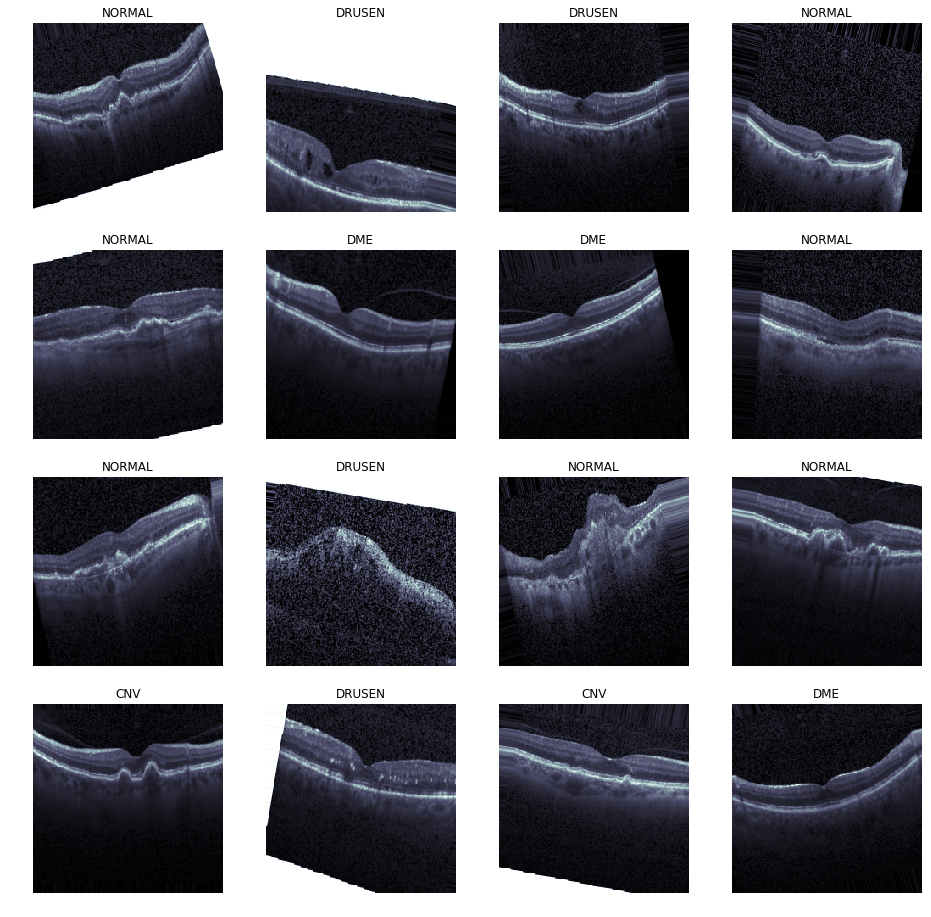

In [5]:
t_x, t_y = next(train_generator)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')

In [6]:
t_x.shape

(16, 224, 224, 3)

In [7]:
# defining densenet model
def conv_layer():
    model=Sequential()
    model.add(Conv2D(64,(5,5),activation='relu',input_shape=(224,224,3),kernel_initializer='he_normal'))
    #model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.5))
    model.add(Conv2D(64,(5,5),activation='relu',padding='same',kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.5))
    model.add(Conv2D(32,(5,5),activation='relu',padding='same',kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.5))
    model.add(Conv2D(32,5,activation='relu',padding='same',kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.5))
    model.add(Conv2D(16,(5,5),activation='relu',padding='same',kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    #model.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
    #model.add(Dropout(0.5))
    model.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
    #model.add(Dropout(0.5))
    model.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(4,activation='softmax'))
    #model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    #history=model.fit(x_train,y_train,epochs=12,batch_size=128,verbose=1,validation_data=(x_test,y_test))
    return model

In [8]:
# compiling model
model = conv_layer()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                           metrics = ['accuracy'])

In [9]:
# creating checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [10]:
# training the model
history = model.fit_generator(train_generator, 
                                  steps_per_epoch=100,
                                  validation_data = (valid_X,valid_Y), 
                                  epochs = 40,
                                  callbacks=callbacks_list)

Epoch 1/40
100/100 [==============================] - 63s 634ms/step - loss: 1.3475 - acc: 0.4138 - val_loss: 1.2150 - val_acc: 0.4502

Epoch 00001: val_acc improved from -inf to 0.45025, saving model to weights.best.hdf5
Epoch 2/40
100/100 [==============================] - 54s 539ms/step - loss: 1.2461 - acc: 0.4425 - val_loss: 1.2744 - val_acc: 0.4580

Epoch 00002: val_acc improved from 0.45025 to 0.45800, saving model to weights.best.hdf5
Epoch 3/40
100/100 [==============================] - 53s 531ms/step - loss: 1.2317 - acc: 0.4825 - val_loss: 1.2113 - val_acc: 0.5012

Epoch 00003: val_acc improved from 0.45800 to 0.50125, saving model to weights.best.hdf5
Epoch 4/40
100/100 [==============================] - 53s 532ms/step - loss: 1.2078 - acc: 0.4675 - val_loss: 1.2052 - val_acc: 0.5155

Epoch 00004: val_acc improved from 0.50125 to 0.51550, saving model to weights.best.hdf5
Epoch 5/40
100/100 [==============================] - 54s 540ms/step - loss: 1.0945 - acc: 0.5894 - val

In [ ]:
# loading the model with best weight
model = dense_model()
model.load_weights(filepath)

In [11]:
# creating test data
test_X, test_Y = next(train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_SIZE , IMG_SIZE),
    batch_size=8000,
    subset='validation',
    class_mode='categorical'))

Found 16696 images belonging to 4 classes.


In [12]:
# predicting y value
y_pred = model.predict(test_X)

In [13]:
pred_class = []
for i in range(len(y_pred)):
    pred_class.append(np.argmax(y_pred[i]))

In [14]:
actual_class = []
for i in range(len(test_Y)):
    actual_class.append(np.argmax(test_Y[i]))

In [15]:
#  accuracy score
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(pred_class,actual_class))

accuracy =  0.78825


In [16]:
# defining confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [0,1,2,3]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

-------------------- Confusion matrix --------------------


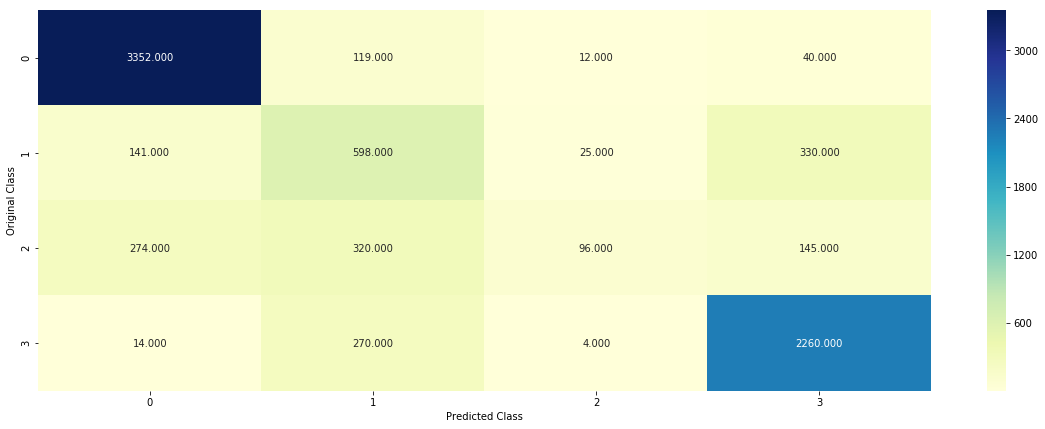

-------------------- Precision matrix (Columm Sum=1) --------------------


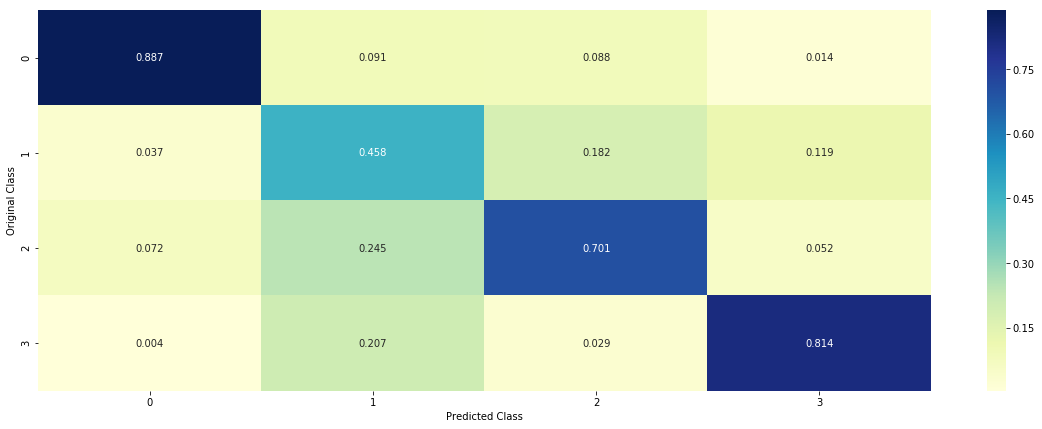

-------------------- Recall matrix (Row sum=1) --------------------


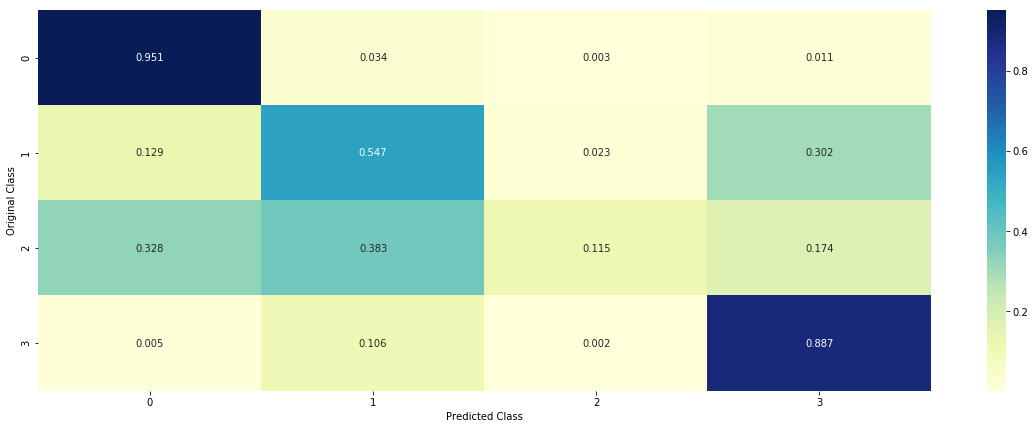

In [17]:
plot_confusion_matrix(actual_class,pred_class)